In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
#Considering from 2012-2017 and combining all the csv in a dataframe
crimes = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

#Removing duplicates and unwanted columns
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
crimes.drop(['Unnamed: 0', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location'], inplace=True, axis=1)

#Formatting data and time
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
crimes.index = pd.DatetimeIndex(crimes.Date)

In [3]:
pd.value_counts(crimes['Location Description'])[:10]

STREET                            330471
RESIDENCE                         233530
APARTMENT                         185023
SIDEWALK                          160891
OTHER                              55774
PARKING LOT/GARAGE(NON.RESID.)     41768
ALLEY                              31771
RESIDENTIAL YARD (FRONT/BACK)      30645
SMALL RETAIL STORE                 28803
SCHOOL, PUBLIC, BUILDING           25959
Name: Location Description, dtype: int64

In [4]:
pd.value_counts(crimes['Primary Type'])[:10]

THEFT                  329460
BATTERY                263700
CRIMINAL DAMAGE        155455
NARCOTICS              135240
ASSAULT                 91289
OTHER OFFENSE           87874
BURGLARY                83397
DECEPTIVE PRACTICE      75495
MOTOR VEHICLE THEFT     61138
ROBBERY                 57313
Name: Primary Type, dtype: int64

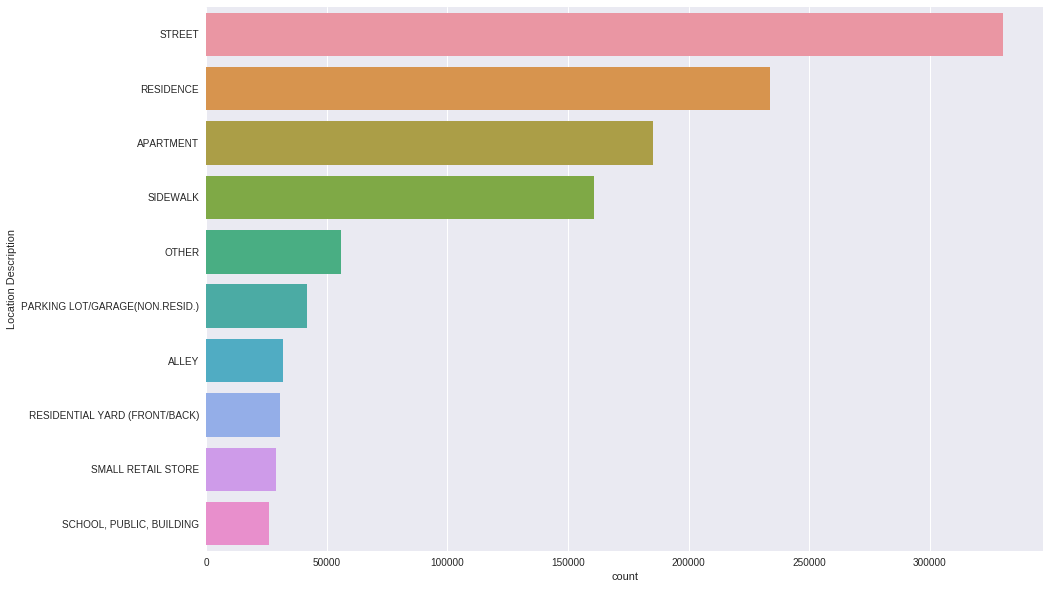

In [5]:
#Location description
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = crimes, order = crimes['Location Description'].value_counts().iloc[:10].index)

In [6]:
#Retaining frequent categorical values and converting them to factors
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
desc_to_change = list(crimes['Description'].value_counts()[20:].index)

crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'

crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

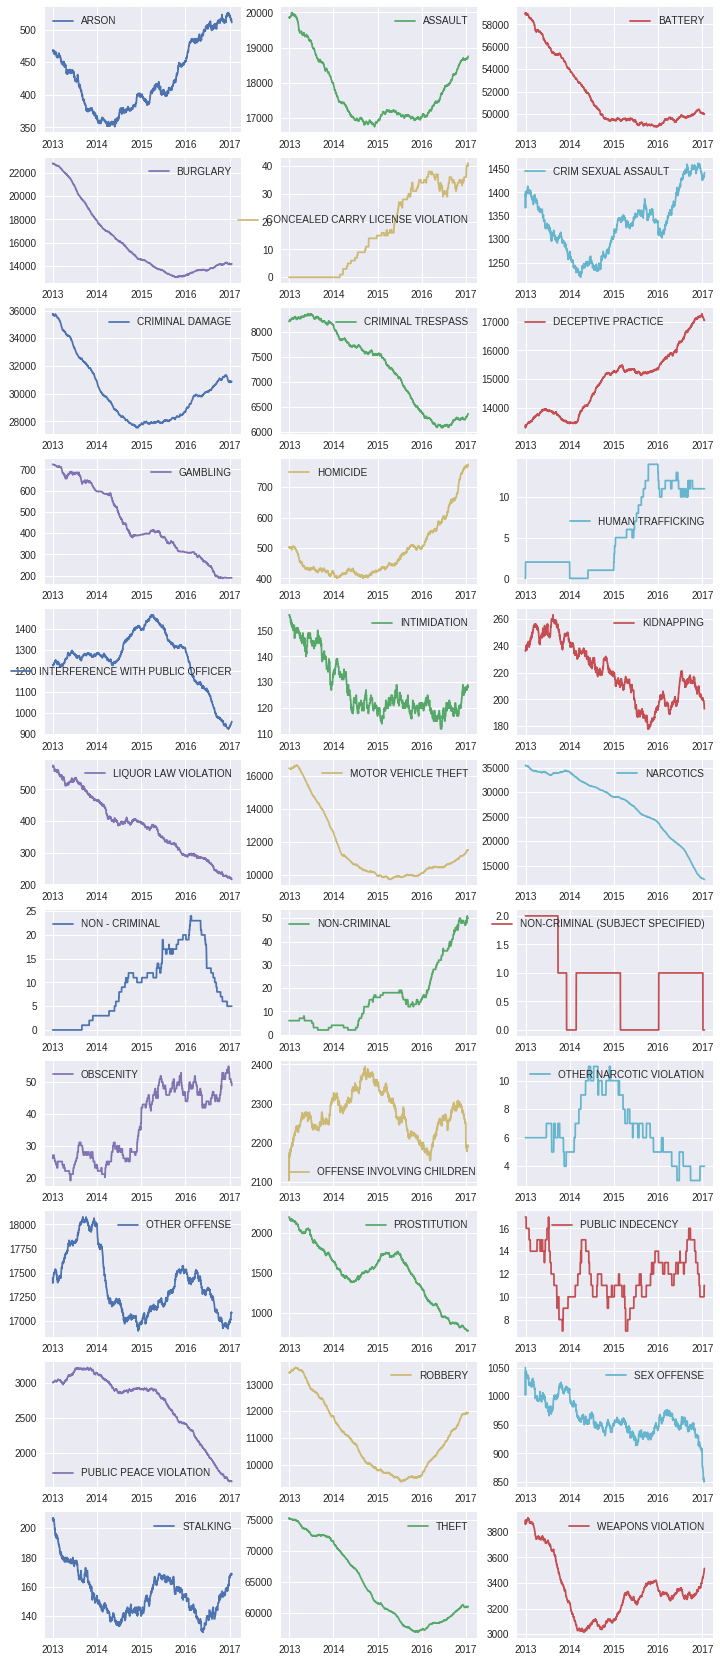

In [7]:
#visualisation of various types of crimes over the years and their frequency
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

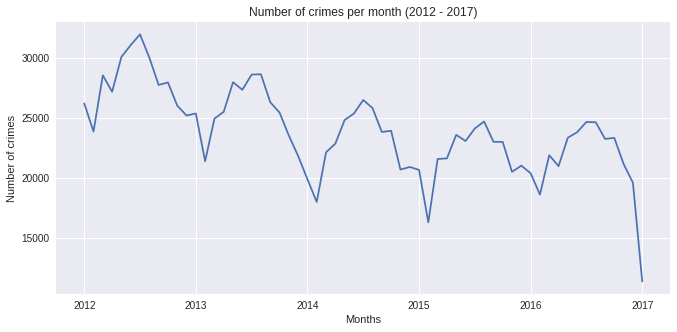

In [9]:
def crimes_rate():
    plt.figure(figsize=(11,5))
    crimes.resample('M').size().plot(legend=False)
    plt.title('Number of crimes per month (2012 - 2017)')
    plt.xlabel('Months')
    plt.ylabel('Number of crimes')
    plt.show()
    
crimes_rate()

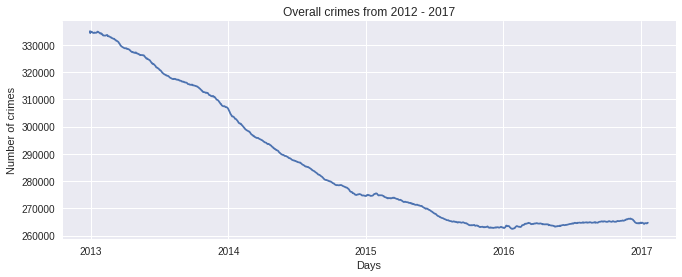

In [10]:
def overall_crimes():
    plt.figure(figsize=(11,4))
    crimes.resample('D').size().rolling(365).sum().plot()
    plt.title('Overall crimes from 2012 - 2017')
    plt.ylabel('Number of crimes')
    plt.xlabel('Days')
    plt.show()
    
overall_crimes()

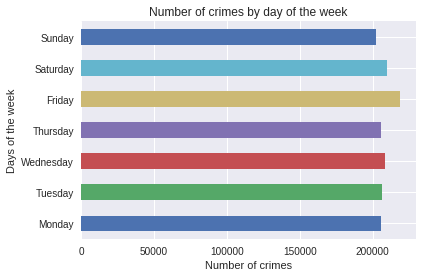

In [11]:
def crimes_by_weekdays():
    days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
    crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
    plt.ylabel('Days of the week')
    plt.yticks(np.arange(7), days)
    plt.xlabel('Number of crimes')
    plt.title('Number of crimes by day of the week')
    plt.show()

crimes_by_weekdays()

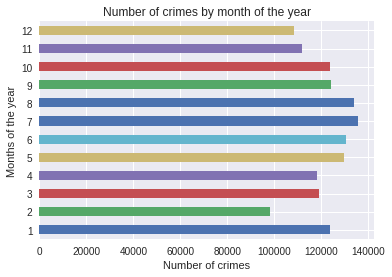

In [12]:
def crimes_by_month():
    crimes.groupby([crimes.index.month]).size().plot(kind='barh')
    plt.ylabel('Months of the year')
    plt.xlabel('Number of crimes')
    plt.title('Number of crimes by month of the year')
    plt.show()
    
crimes_by_month()

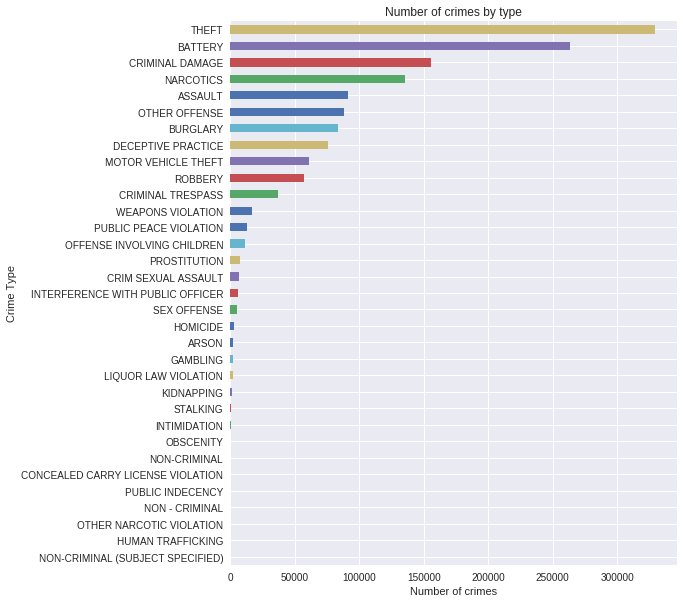

In [13]:
def crimes_by_type():
    plt.figure(figsize=(8,10))
    crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
    plt.title('Number of crimes by type')
    plt.ylabel('Crime Type')
    plt.xlabel('Number of crimes')
    plt.show()
    
crimes_by_type()

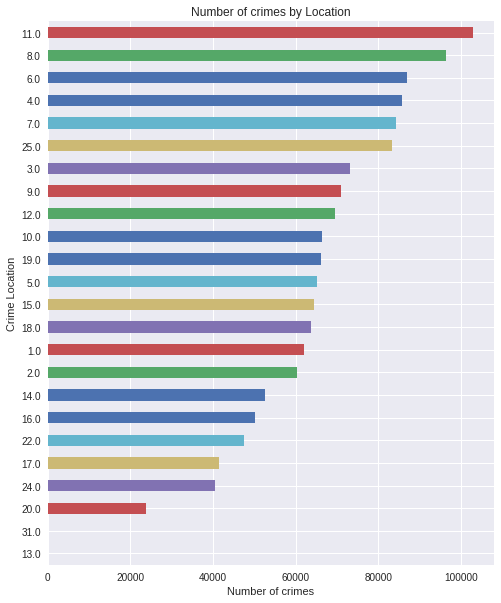

In [14]:
def crimes_by_location():
    plt.figure(figsize=(8,10))
    crimes.groupby([crimes['District']]).size().sort_values(ascending=True).plot(kind='barh')
    plt.title('Number of crimes by Location')
    plt.ylabel('Crime Location')
    plt.xlabel('Number of crimes')
    plt.show()
    
crimes_by_location()